Selim Serbatas  114200049   ---	     M. Shahzeb Malik  	 115200007
            


# Importing all important Libraries

In [1]:
import numpy as np #for multidimensional array object and tools

import pandas as pd #for data manipulation and analysis


import matplotlib.pyplot as plt #plotting framework

import seaborn as sns #graphplot
sns.set()

import random as rn

import numpy as np

from numpy.random import choice as np_choice #returns a random element from the non-empty sequence

from random import random

from random import randint




# Creating Environment

In [2]:
def create_environment(cities = ['A','B','C','D','E','F','G'],  path = ['A', 'F', 'D', 'E'],eps = 0.0001):

    
    
    def distance_matrix(cities, path):
        N =len(cities)
        env = pd.DataFrame(data=np.ones((N,N)) * 10, columns=cities, index = cities)
        
        ## -1: disallowed passage
        for i in range(N):
            env.loc[cities[i], cities[i]] = -1

        for i in range(len(path)-1):
            env.loc[path[i], path[i+1]] = 1
            env.loc[path[i+1], path[i]] = 1

        return env

    def pheremon_matrix(cities, eps = 0.0001):
        N =len(cities)
        return pd.DataFrame(data=np.ones((N,N)) * eps, columns=cities, index = cities)

    return distance_matrix(cities, path), pheremon_matrix(cities)

In [3]:
env, phe = create_environment()

In [4]:
env

,A,B,C,D,E,F,G
A,-1.0,10.0,10.0,10.0,10.0,1.0,10.0
B,10.0,-1.0,10.0,10.0,10.0,10.0,10.0
C,10.0,10.0,-1.0,10.0,10.0,10.0,10.0
D,10.0,10.0,10.0,-1.0,1.0,1.0,10.0
E,10.0,10.0,10.0,1.0,-1.0,10.0,10.0
F,1.0,10.0,10.0,1.0,10.0,-1.0,10.0
G,10.0,10.0,10.0,10.0,10.0,10.0,-1.0


In [5]:
phe

,A,B,C,D,E,F,G
A,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
B,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
C,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
D,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
E,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
F,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
G,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


# Ant Class

In [6]:

class ant():
    def __init__(self, env, phe,
                 start = 'A', end = 'E',
                alpha = 1, beta = 1):
        
        self.env, self.phe  = env, phe
        self.alpha, self.beta = alpha, beta
        self.cities = list(self.env.columns)
        self.current_city = start
        
       
        self.target_city = end
        
        self.route = [self.current_city]
        
        self.possible_cities = self.cities.copy()
        self.possible_cities.remove(self.current_city)
    
    def move(self):
        
        if self.current_city == self.target_city:
            return
        
        
        distances = env.loc[self.current_city , env.loc[self.current_city ] > 0][self.possible_cities]
        
        pheremons = phe.loc[self.current_city , env.loc[self.current_city ] > 0][self.possible_cities]
        
        preferences = pheremons**self.alpha/distances**self.beta
        probabilities = preferences/preferences.sum()
        #print(probabilities)
        
        self.current_city = np.random.choice(a = probabilities.index, 
                                             size=1, 
                                             p = probabilities.values)[0]
        
        self.route.append(self.current_city) 
        self.possible_cities.remove(self.current_city)
        
        self.deposit()
        
        
   
    def deposit(self, delta = 0.01):
        i, j = self.route[-2:]
        self.phe.loc[i, j] +=  delta
        self.phe.loc[j, i] +=  delta
        
        
        
    def run(self):
        while self.current_city != self.target_city:
            self.move()
       
            result = 0
        
    def cost(self):
        
        result = 0
        
        for i in range(len(self.route)-1):
            result += self.env.loc[self.route[i], self.route[i+1]]
        return result

# Self tracking Shortest Path

In [7]:
a = ant(env,phe)
a.current_city

'A'

In [8]:
a.move()
print(a.route)
a.current_city

['A', 'D']


'D'

In [9]:
a.move()
print(a.route)
a.current_city

['A', 'D', 'F']


'F'

In [10]:
a.move()
print(a.route)
a.current_city


['A', 'D', 'F', 'C']


'C'

In [11]:
a.move()
print(a.route)
a.current_city

['A', 'D', 'F', 'C', 'E']


'E'

In [12]:
a.move()
print(a.route)
a.current_city

['A', 'D', 'F', 'C', 'E']


'E'

In [13]:
a.current_city

'E'

In [14]:
phe

,A,B,C,D,E,F,G
A,0.0001,0.0001,0.0001,0.0101,0.0001,0.0001,0.0001
B,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
C,0.0001,0.0001,0.0001,0.0001,0.0101,0.0101,0.0001
D,0.0101,0.0001,0.0001,0.0001,0.0001,0.0101,0.0001
E,0.0001,0.0001,0.0101,0.0001,0.0001,0.0001,0.0001
F,0.0001,0.0001,0.0101,0.0101,0.0001,0.0001,0.0001
G,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


In [15]:
env

,A,B,C,D,E,F,G
A,-1.0,10.0,10.0,10.0,10.0,1.0,10.0
B,10.0,-1.0,10.0,10.0,10.0,10.0,10.0
C,10.0,10.0,-1.0,10.0,10.0,10.0,10.0
D,10.0,10.0,10.0,-1.0,1.0,1.0,10.0
E,10.0,10.0,10.0,1.0,-1.0,10.0,10.0
F,1.0,10.0,10.0,1.0,10.0,-1.0,10.0
G,10.0,10.0,10.0,10.0,10.0,10.0,-1.0


# Updating Pheromone

In [16]:
cities = ['A','B','C','D','E','F','G']
true_path = ['A', 'B','C','D', 'E']
env, phe = create_environment(cities = cities, path = true_path)

eps = 0.0001
K = 10
time = 10
true_path_ratio = []


def pheromone_update(self):
        # Updates the pheromone level of the each of the trails and sorts the paths by lenght.
        # Sort the list according to the size of the lists
        self.sort_paths()
        for i, path in enumerate(self.paths):
            for j, element in enumerate(path):
                for edge in self.map.nodes_array[element[0]][element[1]].edges:
                    if (j+1) < len(path):
                        if edge['FinalNode'] == path[j+1]:
                            edge['Pheromone'] = (1.0 -
                                                 self.evaporation_factor) * \
                            edge['Pheromone'] + \
                            self.pheromone_adding_constant/float(len(path))
                        else:
                            edge['Pheromone'] = (1.0 -
                                                 self.evaporation_factor) * edge['Pheromone']
                            
                            
                            
                            # Update the global pheromone level
                self.pheromone_update()
                self.best_result = self.paths[1]


                phe = pheromone_update

# in each time step
for t in range(time):
    # k ants exist in the colony
    colony = [ant(env = env, phe =phe) for k in range(K)]
    
    # each ant make N moves 
    for i in range(len(cities)):
        # distributed and paralel moves of K ants
        for k in range(K):
            colony[k].move()
        # after independent moves, ants deposit pheremon
        for k in range(K):
            colony[k].deposit()
            
    true_path_ratio.append(np.mean([a.route == true_path for a in colony]))

# Results

In [17]:
true_path_ratio

[0.2, 0.7, 0.9, 1.0, 0.9, 1.0, 1.0, 0.9, 1.0, 1.0]

In [18]:
[(a.cost(), a.route) for a in colony]

[(4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E']),
 (4.0, ['A', 'B', 'C', 'D', 'E'])]

In [19]:
N = 50
path_len = 7
cities = ['A'+str(i) for i in range(N)]
true_path = ['A'+str(i) for i in np.random.choice(N, size=path_len,replace=False)]

start, end = true_path[0], true_path[-1]


In [20]:
print( "Cities = ",cities)
print ( "_" * 30)

Cities =  ['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49']
______________________________


In [21]:
print("Shortest Path = ", true_path)
print ( "_" * 30)

Shortest Path =  ['A11', 'A43', 'A5', 'A16', 'A39', 'A6', 'A19']
______________________________


In [22]:
print("Start/End = ",start, end )
print ( "_" * 30)

Start/End =  A11 A19
______________________________


# Plotting graph for Ants using Pheromone in finding Shortest Path

In [23]:
env, phe = create_environment(cities = cities, path = true_path)


K = 100
time = 10


def pheromone_update(self):
        # Updates the pheromone level of the each of the trails and sorts the paths by lenght.
        # Sort the list according to the size of the lists
        self.sort_paths()
        for i, path in enumerate(self.paths):
            for j, element in enumerate(path):
                for edge in self.map.nodes_array[element[0]][element[1]].edges:
                    if (j+1) < len(path):
                        if edge['FinalNode'] == path[j+1]:
                            edge['Pheromone'] = (1.0 -
                                                 self.evaporation_factor) * \
                            edge['Pheromone'] + \
                            self.pheromone_adding_constant/float(len(path))
                        else:
                            edge['Pheromone'] = (1.0 -
                                                 self.evaporation_factor) * edge['Pheromone']
                            
                            
                            
                            # Update the global pheromone level
                self.pheromone_update()
                self.best_result = self.paths[0]

                phe= pheromone_update
# in each time step
for t in range(time):
    # k ants exist in the colony
    colony = [ant(env = env, phe =phe, start = start, end = end) for k in range(K)]

    # each ant make N moves 
    for i in range(len(cities)):
        # distributed and paralel moves of K ants
        for k in range(K):
            colony[k].move()
        # after independent moves, ants deposit pheremon
        for k in range(K):
            colony[k].deposit()

    true_path_ratio.append(np.mean([a.route == true_path for a in colony]))

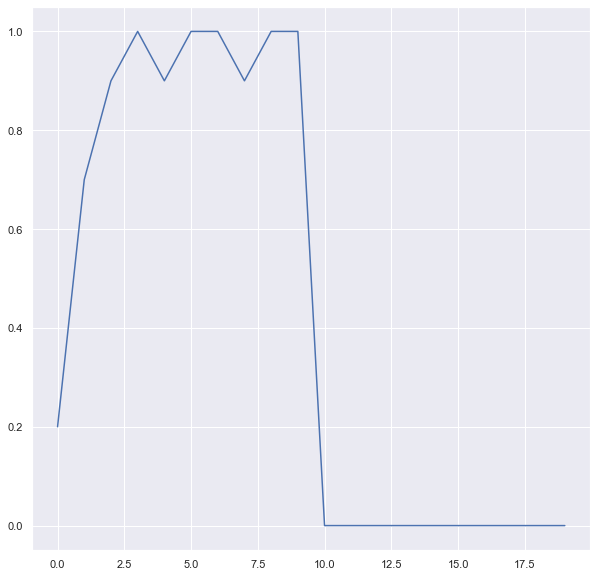

In [34]:
plt.figure(figsize=(10,10)) 
plt.plot(true_path_ratio)
plt.show()


[0.2, 0.7, 0.9, 1.0, 0.9, 1.0, 1.0, 0.9, 1.0, 1.0]

pheromone deposited in 10 sec

In [25]:
phe

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49
A0,0.0001,1.9001,0.0001,0.0001,0.0001,0.0001,2.6601,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A1,1.9001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A2,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0401,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.4001,0.0001,0.0001
A3,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.8401,0.0001,0.0001
A4,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0601,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.6001
A5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.2801,0.3401,0.0601,0.0001,0.0001,0.0001,0.0001,0.6601,3.3201,0.0001
A6,2.6601,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.1601,0.0001,0.0001,0.0001,0.0001,0.2001,5.0601,0.0001,0.0001,0.0001
A7,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0801,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A8,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A9,0.0001,0.0001,0.0401,0.0001,0.0001,0.0001,0.0001,0.0801,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


# Ant_colony Class

In [26]:
class AntColony(object):
    
    def __init__(self, distances,  n_ants , n_best, n_iterations, decay, alpha=1, beta=1):
        
        self.distances  = distances #Square matrix of distances
        self.pheromone = np.ones(self.distances.shape) / len(distances)
        self.all_inds = range(len(distances))
        self.n_ants = n_ants #Number of ants running per iteration
        
        self.n_best = n_best
        self.n_iterations = n_iterations #Number of iterations
        self.decay = decay
        #Rate it which pheromone decays. The pheromone value is multiplied by decay,
        #so 0.95 will lead to decay, 0.5 to much faster decay.
        self.alpha = alpha #exponenet on pheromone
        self.beta = beta #exponent on distance
        #higher alpha gives pheromone more weight and higher beta give distance more weight.
        
    def run(self):
        shortest_path = None
        all_time_shortest_path = ("placeholder", np.inf)
        for i in range(self.n_iterations):
            all_paths = self.gen_all_paths()
            self.spread_pheronome(all_paths, self.n_best, shortest_path=shortest_path)
            shortest_path = min(all_paths, key=lambda x: x[1])
            print (shortest_path)
            if shortest_path[1] < all_time_shortest_path[1]:
                all_time_shortest_path = shortest_path            
            self.pheromone * self.decay            
        return all_time_shortest_path

    def spread_pheronome(self, all_paths, n_best, shortest_path):
        sorted_paths = sorted(all_paths, key=lambda x: x[1])
        # only update pheromones for the best ants
        for path, dist in sorted_paths[:n_best]:
            for move in path:
                self.pheromone[move] += 1.0 / self.distances[move]

    def gen_path_dist(self, path):
        total_dist = 0
        for ele in path:
            total_dist += self.distances[ele]
        return total_dist

    def gen_all_paths(self):
        all_paths = []
        for i in range(self.n_ants):
            path = self.gen_path(0)
            all_paths.append((path, self.gen_path_dist(path)))
        return all_paths

    def gen_path(self, start):
        path = []
        visited = set()
        visited.add(start)
        prev = start
        for i in range(len(self.distances) - 1):
            move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
            path.append((prev, move))
            prev = move
            visited.add(move)
        path.append((prev, start)) # going back to where we started    
        return path

    def pick_move(self, pheromone, dist, visited):
        pheromone = np.copy(pheromone)
        pheromone[list(visited)] = 0 # visited nodes become tabu -- not to be selected again!!

        row = pheromone ** self.alpha * (( 1.0 / dist) ** self.beta)

        norm_row = row / row.sum()
        move = np_choice(self.all_inds, 1, p=norm_row)[0]
        return move
        
        
        
        

In [27]:
    def __init__(self, position=0):
        self.path = [position]

    def _go_to_next(self, graph, available):
        """
        Makes ant go to a next node
        """
        if len(available) == 1:
            self.path.append(available.pop())

        if not available:
            return

        total = 0
        probabilities = {}
        for node_index in available:
            probabilities[node_index] = graph.get_probability(
                self.path[-1], node_index
            )
            total += probabilities[node_index]

        threshold = random()
        probability = 0
        for node_index in available:
            probability += probabilities[node_index] / total
            if threshold < probability:
                self.path.append(node_index)
                return
        self.path.append(available.pop())

    def do_cycle(self, graph):
        """
        The ant goes full cycle
        """
        all_nodes = set(range(len(graph.nodes)))
        available = all_nodes - set(self.path)
        counter = 0
        while available:
            counter += 1
            self._go_to_next(graph, available)
            available = all_nodes - set(self.path)

    def get_passes(self):
        """
        Returns list of passes made by the ant
        """
        length = len(self.path)
        return [
            tuple(sorted(
                (self.path[i], self.path[(i + 1) % length]), reverse=True))
            for i in range(length)
        ]

    def get_distance(self, graph):
        """
        Returns distance traveled by the ant
        """
        return graph.get_path_distance(self.path)

In [28]:
    def __init__(self, m):
        self.ants = []
        self.m = m

        self.shortest_path = None
        self.min_distance = float("inf")

    def reset_ants(self, graph):
        """
        reset ants
        """
        self.ants = []
        nodes = len(graph.nodes) - 1
        for _ in range(self.m):
            self.ants.append(Ant(randint(0, nodes)))

    def do_cycles(self, graph):
        self.reset_ants(graph=graph)
        for ant in self.ants:
            ant.do_cycle(graph=graph)
            graph.local_update_pheromones(passes=ant.get_passes())
            distance = ant.get_distance(graph=graph)
            if self.min_distance > distance:
                self.min_distance = distance
                self.shortest_path = ant.path[:]

In [29]:
distances = np.array([[np.inf, 2, 2, 5, 7],
                      [2, np.inf, 4, 8, 2],
                      [2, 4, np.inf, 1, 3],
                      [5, 8, 1, np.inf, 2],
                      [7, 2, 3, 2, np.inf]])

In [30]:
# distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1
ant_colony = AntColony(distances, 10, 10, 10, 0.95, alpha=1, beta=1)
shortest_path = ant_colony.run()


([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)
([(0, 1), (1, 4), (4, 3), (3, 2), (2, 0)], 9.0)


# Ant_Colony  Result with Mapping

In [31]:
print (" shorted_path: {}".format(shortest_path))

shorted_path: ([(0, 2), (2, 3), (3, 4), (4, 1), (1, 0)], 9.0)


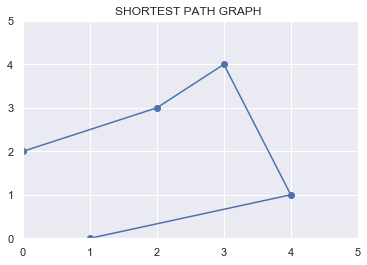

In [32]:


pathdata = ((0, 2),
        (2, 3),
        (3, 4),
        (4, 1),
        (1, 0))


fig, ax = plt.subplots()

(x, y) = zip(*pathdata)
ax.plot(x, y, marker='o')


ax.set_xlim((0, 5))
ax.set_ylim((0, 5))
ax.set(title="SHORTEST PATH GRAPH ")

plt.show()

In [33]:
phe

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49
A0,0.0001,1.9001,0.0001,0.0001,0.0001,0.0001,2.6601,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A1,1.9001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A2,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0401,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.4001,0.0001,0.0001
A3,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.8401,0.0001,0.0001
A4,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0601,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.6001
A5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.2801,0.3401,0.0601,0.0001,0.0001,0.0001,0.0001,0.6601,3.3201,0.0001
A6,2.6601,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.1601,0.0001,0.0001,0.0001,0.0001,0.2001,5.0601,0.0001,0.0001,0.0001
A7,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0801,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A8,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
A9,0.0001,0.0001,0.0401,0.0001,0.0001,0.0001,0.0001,0.0801,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
